# Assignment 2 - Weather
---------
Program that reads the temperature along the time and plot it.

In [1]:
import csv

FILENAME = "weatherreadings1.csv"

DATADIR = "./csv/"

with open (DATADIR + FILENAME, "rt") as fp:
    reader = csv.reader(fp, delimiter=",")
    linecount = 0
    for line in reader:
        if not linecount:
            print (f"{line[1]}, {line[13]}\n______") # Column 1 is "reportStartDateTime" and 13 is the "dryBulbTemperature_Celsius".
        else:
            print (f"{line[1]}, {line[13]}")
        linecount += 1


reportStartDateTime, dryBulbTemperature_Celsius
______
2024-10-02T16:15:00+00:00, 15.944444444444446
2024-10-02T16:45:00+00:00, 15.777777777777777
2024-10-02T17:00:00+00:00, 15.111111111111112
2024-10-02T17:15:00+00:00, 14.277777777777779
2024-10-02T17:30:00+00:00, 13.666666666666668
2024-10-02T17:45:00+00:00, 13.22222222222222
2024-10-02T18:00:00+00:00, 12.999999999999998
2024-10-02T18:15:00+00:00, 12.5
2024-10-02T18:30:00+00:00, 11.944444444444445
2024-10-02T18:45:00+00:00, 11.500000000000002
2024-10-02T19:00:00+00:00, 11.11111111111111
2024-10-02T19:15:00+00:00, 10.833333333333334
2024-10-02T19:30:00+00:00, 10.555555555555555
2024-10-02T19:45:00+00:00, 10.277777777777777
2024-10-02T20:00:00+00:00, 10.222222222222221
2024-10-02T20:15:00+00:00, 10.055555555555555
2024-10-02T20:30:00+00:00, 9.944444444444443
2024-10-02T20:45:00+00:00, 9.888888888888888
2024-10-02T21:00:00+00:00, 10.333333333333334
2024-10-02T21:15:00+00:00, 10.72222222222222
2024-10-02T21:30:00+00:00, 10.99999999999999

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

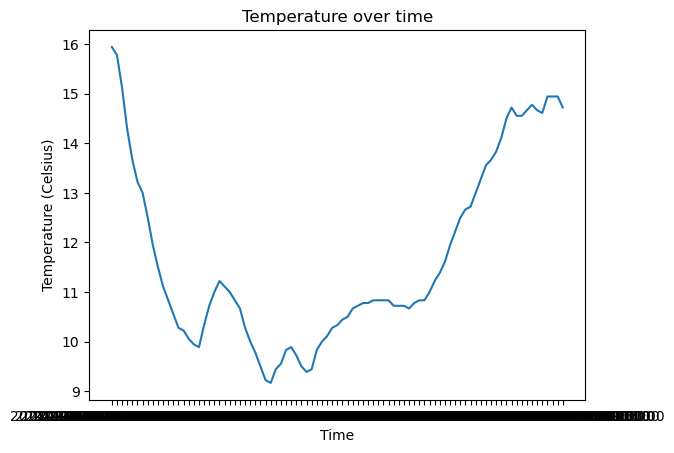

In [3]:
logFilename = DATADIR + FILENAME

df = pd.read_csv(logFilename)

x = df["reportStartDateTime"]
y = df["dryBulbTemperature_Celsius"]

fig, ax = plt.subplots()

ax.plot(x,y)

ax.set(xlabel="Time", ylabel="Temperature (Celsius)", title="Temperature over time")

plt.show()

In [12]:
# Need to clean the data so it can be considered as a datetime object.

# https://www.geeksforgeeks.org/replacing-column-value-of-a-csv-file-in-python/

# reading the CSV file.
text = open(logFilename, "r") 
  
# join() will allow to identify the data of csv as a string.
text = "".join([i for i in text])  
  
# search and replace the contents .
text = text.replace("2T", "2 ")  
text = text.replace("3T", "3 ")
text = text.replace("+00:00", "")
  
# write in csv and close it.
weather = open(logFilename,"w") 
weather.writelines(text) 
weather.close()

In [13]:
# Check the result
print(x) 

0    2024-10-02 16:15:00+00:00
1    2024-10-02 16:45:00+00:00
2    2024-10-02 17:00:00+00:00
3    2024-10-02 17:15:00+00:00
4    2024-10-02 17:30:00+00:00
                ...           
84   2024-10-03 14:00:00+00:00
85   2024-10-03 14:15:00+00:00
86   2024-10-03 14:30:00+00:00
87   2024-10-03 14:45:00+00:00
88   2024-10-03 15:00:00+00:00
Name: reportStartDateTime, Length: 89, dtype: datetime64[ns, UTC]


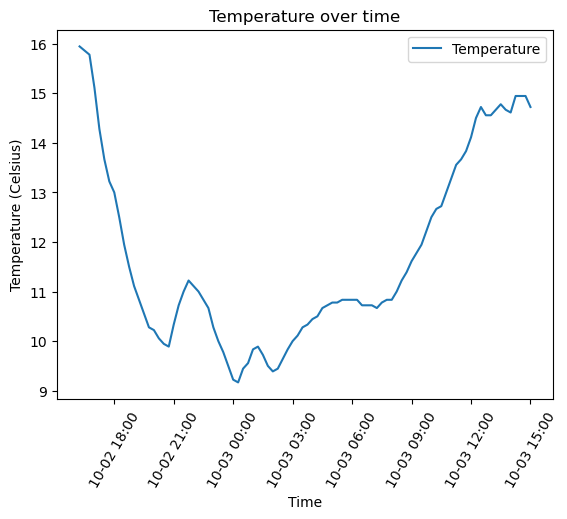

In [14]:
# Need to fix the x axis, for a better representation.

# https://stackoverflow.com/questions/1574088/plotting-time-on-the-independent-axis
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime
# #https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/

import matplotlib.dates as mdates

# convert object to datetime.
x = pd.to_datetime(x) 

myFmt = mdates.DateFormatter("%m-%d %H:%M")
plt.gca().xaxis.set_major_formatter(myFmt)

plt.plot(x, y, label="Temperature")
plt.title("Temperature over time")
plt.xlabel("Time")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.xticks(rotation=60)

plt.show()